# Finemapping using susieR

## Data preparation

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

### Load sumstats

In [2]:
sumstats = gl.Sumstats("./1kgeas.B1.glm.firth.gz",fmt="plink2")

2024/04/19 22:44:31 GWASLab v3.4.43 https://cloufield.github.io/gwaslab/
2024/04/19 22:44:31 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/04/19 22:44:31 Start to load format from formatbook....
2024/04/19 22:44:31  -plink2 format meta info:
2024/04/19 22:44:31   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
2024/04/19 22:44:31   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
2024/04/19 22:44:31   - format_version  : Alpha 3.3 final (3 Jun)
2024/04/19 22:44:31   - last_check_date  :  20220806
2024/04/19 22:44:31  -plink2 to gwaslab format dictionary:
2024/04/19 22:44:31   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,T_STAT,Z_STAT,P,LOG10_P,MACH_R2,OR
2024/04/19 22:44:31   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,T,Z,P,MLOG10P,INFO,OR
2024/04/19 22:44:31 Start to initialize gl.Sumstats from file :./1kgeas.B1.glm.firth.gz
2024/04/19 22:44:32  -Reading columns          : #CHROM,

In [3]:
import pandas as pd
df = pd.concat([sumstats.data[["SNPID","CHR","POS","EA","NEA","EAF","N","STATUS","REF","ALT"]]]*20, ignore_index=True).copy()
df

,SNPID,CHR,POS,EA,NEA,EAF,N,STATUS,REF,ALT
0,1:15774:G:A,1,15774,A,G,0.028283,495,9999999,G,A
1,1:15777:A:G,1,15777,G,A,0.073737,495,9999999,A,G
2,1:57292:C:T,1,57292,T,C,0.104675,492,9999999,C,T
3,1:77874:G:A,1,77874,A,G,0.019153,496,9999999,G,A
4,1:87360:C:T,1,87360,T,C,0.023139,497,9999999,C,T
...,...,...,...,...,...,...,...,...,...,...
22574635,22:51217954:G:A,22,51217954,A,G,0.033199,497,9999999,G,A
22574636,22:51218377:G:C,22,51218377,C,G,0.033333,495,9999999,G,C
22574637,22:51218615:T:A,22,51218615,A,T,0.033266,496,9999999,T,A
22574638,22:51222100:G:T,22,51222100,T,G,0.039157,498,9999999,G,T


In [4]:
sumstats = gl.Sumstats(df,fmt="gwaslab")
df = 0
gc.collect()

2024/04/19 22:44:35 GWASLab v3.4.43 https://cloufield.github.io/gwaslab/
2024/04/19 22:44:35 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/04/19 22:44:35 Start to load format from formatbook....
2024/04/19 22:44:35  -gwaslab format meta info:
2024/04/19 22:44:35   - format_name  : gwaslab
2024/04/19 22:44:35   - format_source  : https://cloufield.github.io/gwaslab/
2024/04/19 22:44:35   - format_version  : 20231220_v4
2024/04/19 22:44:35 Start to initialize gl.Sumstats from pandas DataFrame ...
2024/04/19 22:44:43  -Reading columns          : POS,EA,STATUS,CHR,N,REF,EAF,ALT,NEA,SNPID
2024/04/19 22:44:43  -Renaming columns to      : POS,EA,STATUS,CHR,N,REF,EAF,ALT,NEA,SNPID
2024/04/19 22:44:43  -Current Dataframe shape : 22574640  x  10
2024/04/19 22:44:44  -Initiating a status column: STATUS ...
2024/04/19 22:44:44  #WARNING! Version of genomic coordinates is unknown...
2024/04/19 22:44:45  -EA,REF and ALT columns are available: assigning NEA...
2024/04/19 

0

In [5]:
sumstats.data["EA"]="AA"
sumstats.data["NEA"]="AT"

In [6]:
sumstats.basic_check()

2024/04/19 22:44:47 Start to check SNPID/rsID...v3.4.43
2024/04/19 22:44:47  -Current Dataframe shape : 22574640 x 10 ; Memory usage: 1354.73 MB
2024/04/19 22:44:47  -Checking SNPID data type...
2024/04/19 22:44:47  -Converting SNPID to pd.string data type...
2024/04/19 22:44:48  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2024/04/19 22:45:08 Finished checking SNPID/rsID.
2024/04/19 22:45:08 Start to fix chromosome notation (CHR)...v3.4.43
2024/04/19 22:45:08  -Current Dataframe shape : 22574640 x 10 ; Memory usage: 1354.73 MB
2024/04/19 22:45:08  -Checking CHR data type...
2024/04/19 22:45:59  -Variants with standardized chromosome notation: 22574640
2024/04/19 22:46:49  -All CHR are already fixed...
2024/04/19 22:47:49 Finished fixing chromosome notation (CHR).
2024/04/19 22:47:49 Start to fix basepair positions (POS)...v3.4.43
2024/04/19 22:47:49  -Current Dataframe shape : 22574640 x 10 ; Memory usage: 1376.26 MB
2024/04/19 22:47:49  -Converting to Int64 data type 

In [ ]:
sumstats.memory_usage()

### Data standardization and sanity check

In [10]:
sumstats.basic_check(sanitycheckstats_args={"OR":(-10,10)})

Fri Apr 19 20:13:50 2024 Start to check IDs...
Fri Apr 19 20:13:50 2024  -Current Dataframe shape : 1128732  x  14
Fri Apr 19 20:13:50 2024  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Apr 19 20:13:51 2024 Finished checking IDs successfully!
Fri Apr 19 20:13:51 2024 Start to fix chromosome notation...
Fri Apr 19 20:13:51 2024  -Current Dataframe shape : 1128732  x  14
Fri Apr 19 20:13:51 2024  -Checking CHR data type...
Fri Apr 19 20:13:54 2024  -Variants with standardized chromosome notation: 1128732
Fri Apr 19 20:13:57 2024  -All CHR are already fixed...
Fri Apr 19 20:13:58 2024  -Sanity check for CHR...
Fri Apr 19 20:14:00 2024  -Removed 0 varaints with CHR < 1...
Fri Apr 19 20:14:01 2024 Finished fixing chromosome notation successfully!
Fri Apr 19 20:14:01 2024 Start to fix basepair positions...
Fri Apr 19 20:14:01 2024  -Current Dataframe shape : 1128732  x  14
Fri Apr 19 20:14:01 2024  -Converting to Int64 data type ...
Fri Apr 19 20:14:02 2024  -Position up

Note: 220793 variants were removed due to na Z values.This is due to FIRTH_CONVERGE_FAIL when performing GWAS using PLINK2.

### Extract lead variants

In [11]:
sumstats.get_lead()

Fri Apr 19 20:14:09 2024 Start to extract lead variants...
Fri Apr 19 20:14:09 2024  -Processing 907939 variants...
Fri Apr 19 20:14:09 2024  -Significance threshold : 5e-08
Fri Apr 19 20:14:09 2024  -Sliding window size: 500  kb
Fri Apr 19 20:14:09 2024  -Found 43 significant variants in total...
Fri Apr 19 20:14:09 2024  -Identified 4 lead variants!
Fri Apr 19 20:14:09 2024 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
44298,1:167562605:G:A,1,167562605,A,G,0.391481,0.159645,7.69462,1.419150e-14,3.415780,493,9960099,G,A
91266,2:55513738:C:T,2,55513738,C,T,0.376008,0.153159,-7.96244,1.686760e-15,0.295373,496,9960099,C,T
442239,7:134368632:T:G,7,134368632,G,T,0.138105,0.225526,6.89025,5.569440e-12,4.730010,496,9960099,T,G
875859,20:42758834:T:C,20,42758834,T,C,0.227273,0.184323,-7.76902,7.909780e-15,0.238829,495,9960099,T,C


### Create manhattan plot for checking

Fri Apr 19 20:15:00 2024 Start to plot manhattan/qq plot with the following basic settings:
Fri Apr 19 20:15:00 2024  -Genomic coordinates version: 99...
Fri Apr 19 20:15:00 2024    -WARNING!!! Genomic coordinates version is unknown...
Fri Apr 19 20:15:00 2024  -Genome-wide significance level is set to 5e-08 ...
Fri Apr 19 20:15:00 2024  -Raw input contains 907939 variants...
Fri Apr 19 20:15:00 2024  -Plot layout mode is : mqq
Fri Apr 19 20:15:00 2024 Finished loading specified columns from the sumstats.
Fri Apr 19 20:15:00 2024 Start conversion and sanity check:
Fri Apr 19 20:15:00 2024  -Removed 0 variants with nan in CHR or POS column ...
Fri Apr 19 20:15:02 2024  -Removed 0 varaints with CHR <=0...
Fri Apr 19 20:15:02 2024  -Removed 0 variants with nan in P column ...
Fri Apr 19 20:15:02 2024  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Apr 19 20:15:02 2024  -Sumstats P values are being converted to -log10(P)...
Fri Apr 19 20:15:

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.Log.Log at 0x7f8f8f8cf220>)

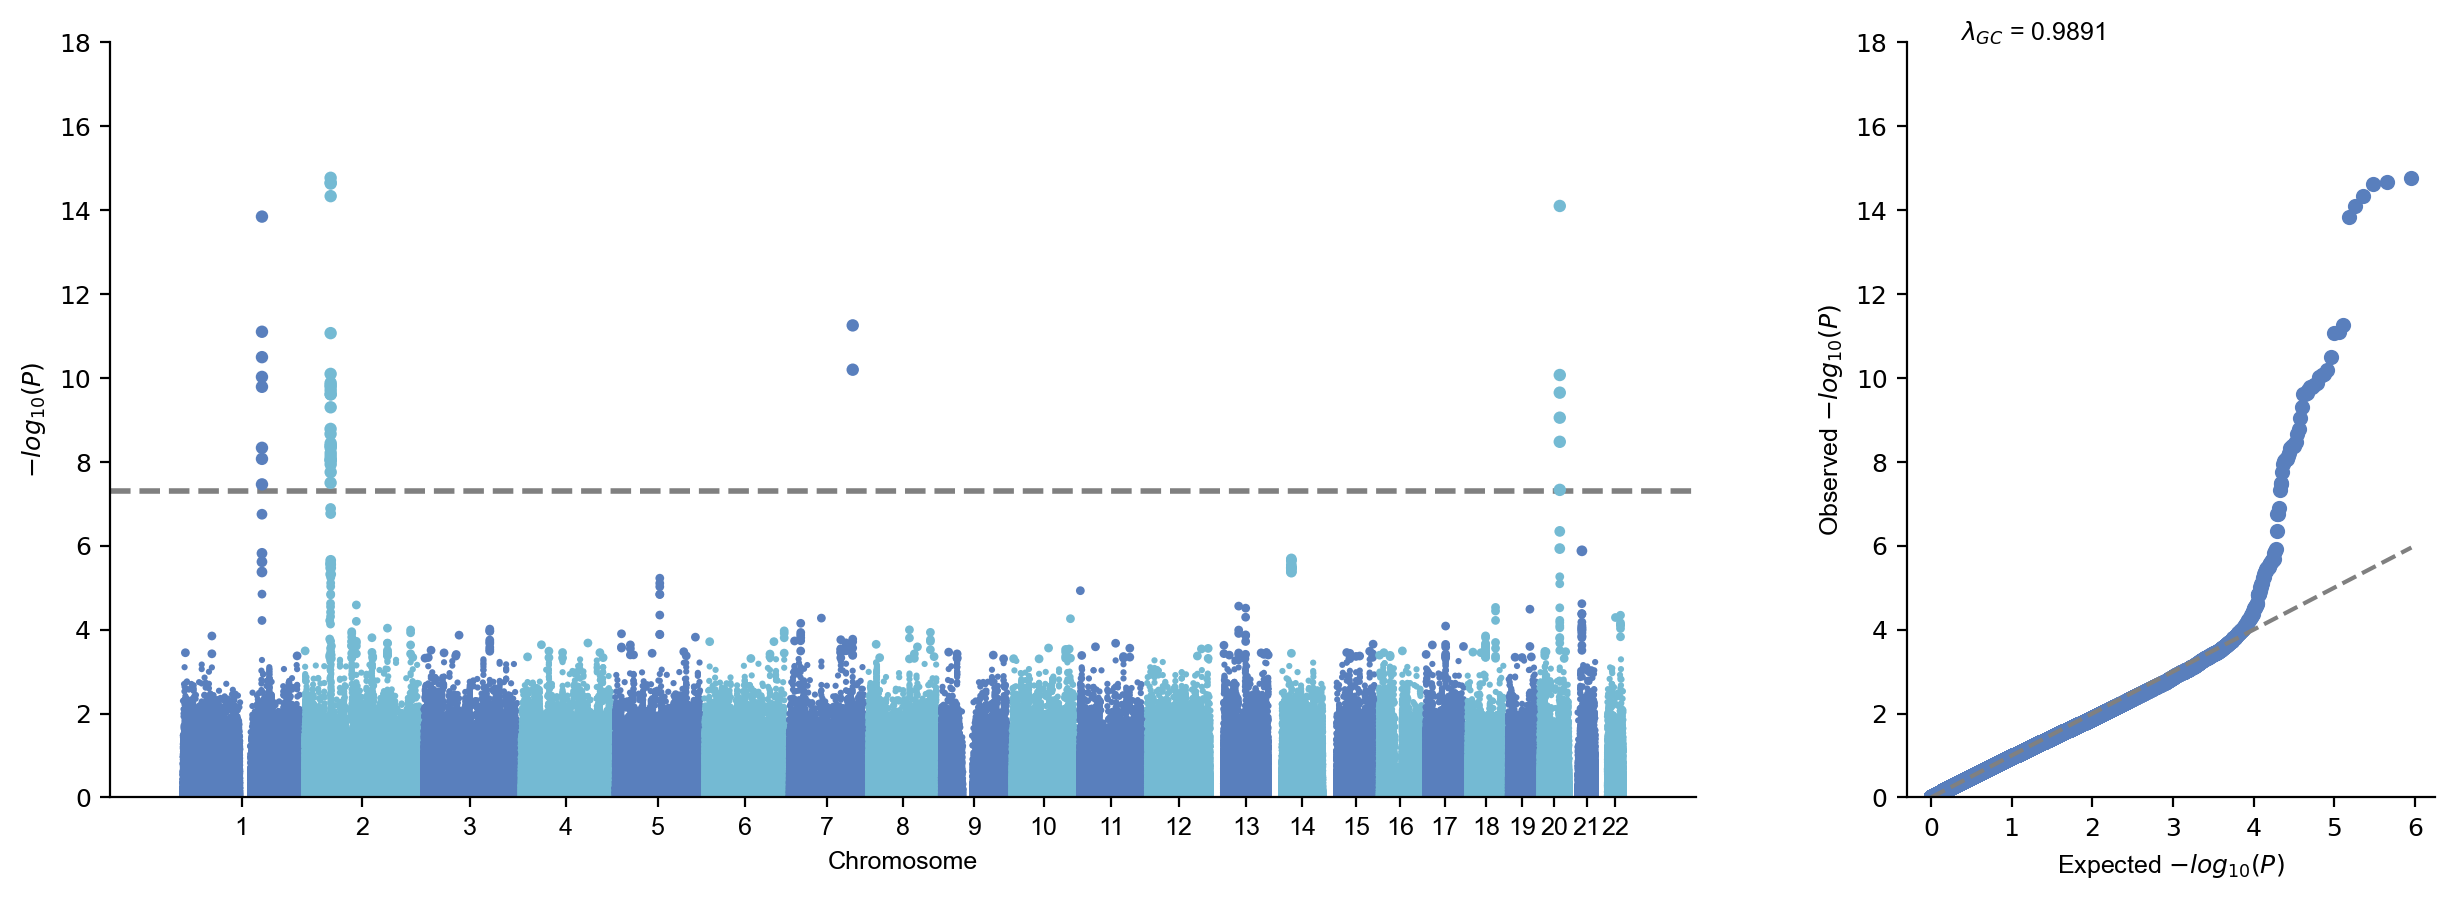

In [13]:
sumstats.plot_mqq()

### Extract the variants around 2:55513738:C:T for finemapping

In [14]:
locus = sumstats.filter_value('CHR==2 & POS>55013738 & POS<56013738')

Fri Apr 19 20:15:18 2024 Start filtering values by condition: CHR==2 & POS>55013738 & POS<56013738
Fri Apr 19 20:15:18 2024  -Removing 907560 variants not meeting the conditions: CHR==2 & POS>55013738 & POS<56013738
Fri Apr 19 20:15:18 2024 Finished filtering values.


### Convert OR to BETA

In [15]:
locus.fill_data(to_fill=["BETA"])

Fri Apr 19 20:15:18 2024 Start filling data using existing columns...
Fri Apr 19 20:15:18 2024  -Raw input columns:  ['SNPID', 'CHR', 'POS', 'EA', 'NEA', 'EAF', 'SE', 'Z', 'P', 'OR', 'N', 'STATUS', 'REF', 'ALT']
Fri Apr 19 20:15:18 2024  -Overwrite mode:  False
Fri Apr 19 20:15:18 2024   -Skipping columns:  []
Fri Apr 19 20:15:18 2024  -Filling columns:  ['BETA']
Fri Apr 19 20:15:18 2024   - Filling Columns iteratively...
Fri Apr 19 20:15:18 2024   - Filling BETA value using OR column...
Fri Apr 19 20:15:18 2024 Start to reorder the columns...
Fri Apr 19 20:15:18 2024  -Current Dataframe shape : 379  x  15
Fri Apr 19 20:15:18 2024  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT
Fri Apr 19 20:15:18 2024 Finished sorting columns successfully!
Fri Apr 19 20:15:18 2024 Finished filling data using existing columns.


In [16]:
locus.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT
91067,2:55015281:A:T,2,55015281,T,A,0.126263,-0.048075,0.193967,-0.247856,0.804246,0.953062,495,9960099,A,T
91068,2:55015604:G:A,2,55015604,A,G,0.119192,-0.047357,0.195199,-0.242606,0.808311,0.953747,495,9960099,G,A
91069,2:55015764:G:A,2,55015764,A,G,0.339394,0.028986,0.135064,0.214575,0.830098,1.029410,495,9960099,G,A
91070,2:55016143:A:C,2,55016143,C,A,0.126263,0.004659,0.195728,0.023784,0.981025,1.004670,495,9960099,A,C
91071,2:55017199:T:C,2,55017199,C,T,0.093306,0.268767,0.219657,1.223580,0.221112,1.308350,493,9960099,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91441,2:56004219:G:T,2,56004219,G,T,0.171717,0.148489,0.169557,0.875763,0.381159,1.160080,495,9960099,G,T
91442,2:56007034:T:C,2,56007034,T,C,0.260121,0.073325,0.145565,0.503737,0.614446,1.076080,494,9960099,T,C
91443,2:56008984:C:G,2,56008984,G,C,0.013185,0.205883,0.547226,0.376227,0.706748,1.228610,493,9960099,C,G
91444,2:56009480:A:T,2,56009480,A,T,0.157258,0.135667,0.177621,0.763784,0.444996,1.145300,496,9960099,A,T


### Align NEA with reference sequence

In [17]:
locus.harmonize(basic_check=False, ref_seq="/home/yunye/mydata/d_disk/human_g1k_v37.fasta")

Fri Apr 19 20:15:18 2024 Start to check if NEA is aligned with reference sequence...
Fri Apr 19 20:15:18 2024  -Current Dataframe shape : 379  x  15
Fri Apr 19 20:15:18 2024  -Reference genome fasta file: /home/yunye/mydata/d_disk/human_g1k_v37.fasta
Fri Apr 19 20:15:18 2024  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  MT  
Fri Apr 19 20:16:30 2024  -Variants allele on given reference sequence :  264
Fri Apr 19 20:16:30 2024  -Variants flipped :  115
Fri Apr 19 20:16:30 2024   -Raw Matching rate :  100.00%
Fri Apr 19 20:16:30 2024  -Variants inferred reverse_complement :  0
Fri Apr 19 20:16:30 2024  -Variants inferred reverse_complement_flipped :  0
Fri Apr 19 20:16:30 2024  -Both allele on genome + unable to distinguish :  0
Fri Apr 19 20:16:30 2024  -Variants not on given reference sequence :  0
Fri Apr 19 20:16:30 2024  -Current Dataframe shape : 379  x  15
Fri Apr 19 20:16:30 2024 Start to flip allele-specific stats for SN

In [18]:
locus.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT
0,2:55015281:A:T,2,55015281,T,A,0.126263,-0.048075,0.193967,-0.247856,0.804246,0.953062,495,9960009,A,T
1,2:55015604:G:A,2,55015604,A,G,0.119192,-0.047357,0.195199,-0.242606,0.808311,0.953747,495,9960009,G,A
2,2:55015764:G:A,2,55015764,A,G,0.339394,0.028986,0.135064,0.214575,0.830098,1.029410,495,9960009,G,A
3,2:55016143:A:C,2,55016143,C,A,0.126263,0.004659,0.195728,0.023784,0.981025,1.004670,495,9960009,A,C
4,2:55017199:T:C,2,55017199,C,T,0.093306,0.268767,0.219657,1.223580,0.221112,1.308350,493,9960009,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2:56004219:G:T,2,56004219,T,G,0.828283,-0.148489,0.169557,0.875763,0.381159,0.862010,495,9960019,G,T
375,2:56007034:T:C,2,56007034,C,T,0.739879,-0.073325,0.145565,0.503737,0.614446,0.929299,494,9960019,T,C
376,2:56008984:C:G,2,56008984,G,C,0.013185,0.205883,0.547226,0.376227,0.706748,1.228610,493,9960009,C,G
377,2:56009480:A:T,2,56009480,T,A,0.842742,-0.135667,0.177621,0.763784,0.444996,0.873134,496,9960019,A,T


### Output the sumstats of this locus

In [19]:
locus.data.to_csv("sig_locus.tsv",sep="\t",index=None)
locus.data["SNPID"].to_csv("sig_locus.snplist",sep="\t",index=None,header=None)

### Run PLINK to get LD matrix for this locus

In [20]:
!plink \
  --bfile "../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r square \
  --extract sig_locus.snplist \
  --out sig_locus_mt

!plink \
  --bfile "../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r2 square \
  --extract sig_locus.snplist \
  --out sig_locus_mt_r2

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to sig_locus_mt.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract sig_locus.snplist
  --keep-allele-order
  --out sig_locus_mt
  --r square

24011 MB RAM detected; reserving 12005 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to sig_locus_mt.nosex .
--extract: 379 variants remaining.
Using up to 11 threads (change this with --threads).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99

## Finemapping 

In [21]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as numpy2ri
numpy2ri.activate()

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /home/yunye/anaconda3/lib/R
INFO:rpy2.situation:R library path: 
INFO:rpy2.situation:LD_LIBRARY_PATH: 
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


### Load locus sumstats

In [22]:
df = pd.read_csv("sig_locus.tsv",sep="\t")
df 

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT
0,2:55015281:A:T,2,55015281,T,A,0.126263,-0.048075,0.193967,-0.247856,0.804246,0.953062,495,9960009,A,T
1,2:55015604:G:A,2,55015604,A,G,0.119192,-0.047357,0.195199,-0.242606,0.808311,0.953747,495,9960009,G,A
2,2:55015764:G:A,2,55015764,A,G,0.339394,0.028986,0.135064,0.214575,0.830098,1.029410,495,9960009,G,A
3,2:55016143:A:C,2,55016143,C,A,0.126263,0.004659,0.195728,0.023784,0.981025,1.004670,495,9960009,A,C
4,2:55017199:T:C,2,55017199,C,T,0.093306,0.268767,0.219657,1.223580,0.221112,1.308350,493,9960009,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2:56004219:G:T,2,56004219,T,G,0.828283,-0.148489,0.169557,0.875763,0.381159,0.862009,495,9960019,G,T
375,2:56007034:T:C,2,56007034,C,T,0.739879,-0.073325,0.145565,0.503737,0.614446,0.929299,494,9960019,T,C
376,2:56008984:C:G,2,56008984,G,C,0.013185,0.205883,0.547226,0.376227,0.706748,1.228610,493,9960009,C,G
377,2:56009480:A:T,2,56009480,T,A,0.842742,-0.135667,0.177621,0.763784,0.444996,0.873134,496,9960019,A,T


### Import sumsieR

In [23]:
# import susieR as object
susieR = importr('susieR')

### Load LD matrix

In [24]:
# convert pd.DataFrame to numpy
ld = pd.read_csv("sig_locus_mt.ld",sep="\t",header=None)
R_df = ld.values
ld2 = pd.read_csv("sig_locus_mt_r2.ld",sep="\t",header=None)
R_df2 = ld2.values

In [25]:
R_df

array([[ 1.00000e+00,  9.58562e-01, -3.08678e-01, ...,  1.96204e-02,
        -3.54602e-04, -7.14868e-03],
       [ 9.58562e-01,  1.00000e+00, -2.97617e-01, ...,  2.47755e-02,
        -1.49234e-02, -7.00509e-03],
       [-3.08678e-01, -2.97617e-01,  1.00000e+00, ..., -3.49335e-02,
        -1.37163e-02, -2.12828e-02],
       ...,
       [ 1.96204e-02,  2.47755e-02, -3.49335e-02, ...,  1.00000e+00,
         5.26193e-02, -3.09069e-02],
       [-3.54602e-04, -1.49234e-02, -1.37163e-02, ...,  5.26193e-02,
         1.00000e+00, -3.01142e-01],
       [-7.14868e-03, -7.00509e-03, -2.12828e-02, ..., -3.09069e-02,
        -3.01142e-01,  1.00000e+00]])

### Visualize the LD structure of this locus

Text(0.5, 1.0, 'LD r2 matrix')

<Figure size 2000x2000 with 0 Axes>

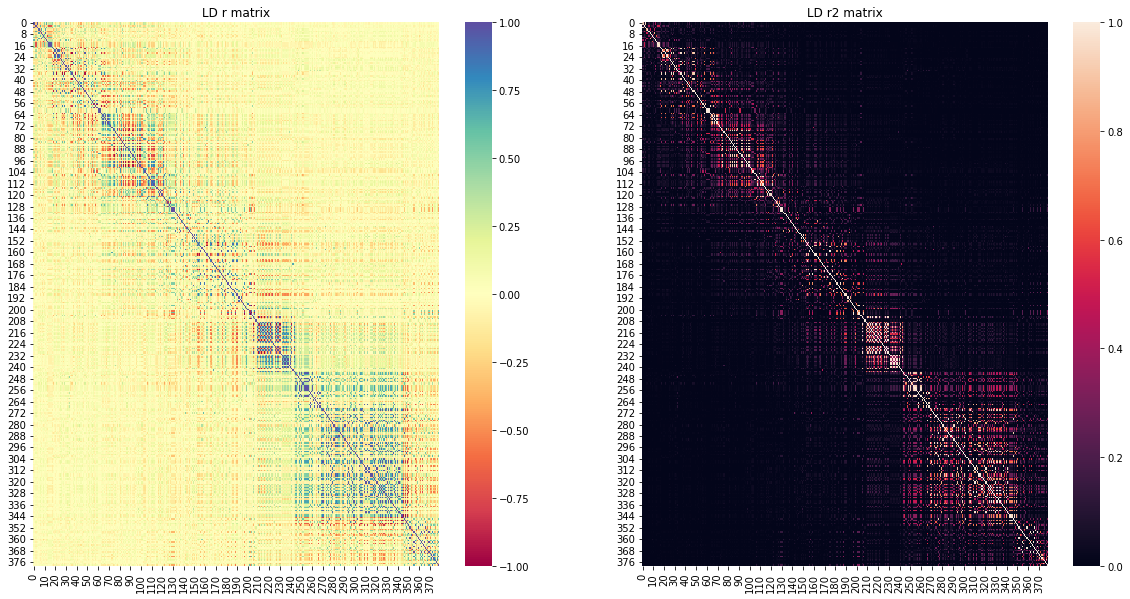

In [26]:
plt.figure(figsize=(10,10),dpi=200)
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
sns.heatmap(data=R_df,cmap="Spectral",ax=ax[0])
sns.heatmap(data=R_df2,ax=ax[1])
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")

https://stephenslab.github.io/susieR/articles/finemapping_summary_statistics.html#fine-mapping-with-susier-using-summary-statistics

### Run finemapping use susieR

In [27]:
ro.r('set.seed(123)')
fit = susieR.susie_rss(
    bhat = df["BETA"].values.reshape((len(R_df),1)),
    shat = df["SE"].values.reshape((len(R_df),1)),
    R = R_df,
    L = 10,
    n = 503
)

### Extract credible sets and PIP

In [28]:
# show the results of susie_get_cs
print(susieR.susie_get_cs(fit, coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0])

$L1
[1] 200 218 221 224




We found 1 credible set here

In [29]:
# add the information to dataframe for plotting
df["cs"] = 0
n_cs=len(susieR.susie_get_cs(fit, coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0])
for i in range(n_cs):
    cs_index = susieR.susie_get_cs(fit,coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0][i]
    df.loc[np.array(cs_index)-1,"cs"] = i + 1
df["pip"] = np.array(susieR.susie_get_pip(fit))

### Create regional plot

/tmp/ipykernel_3707/3928380454.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[0].scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],


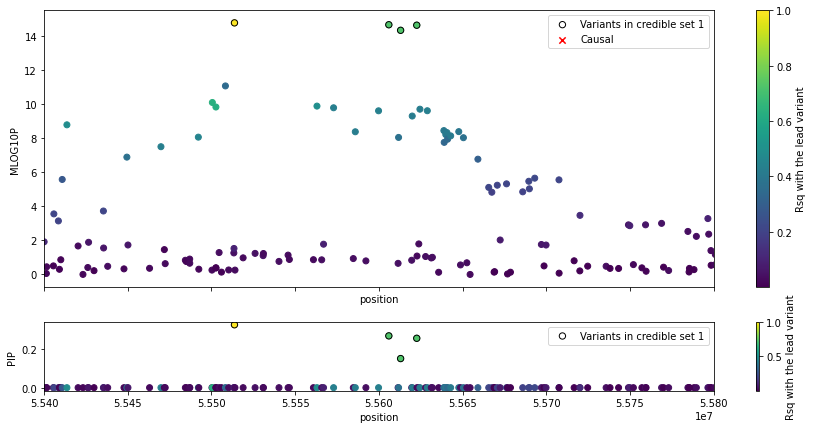

In [30]:
fig ,axes = plt.subplots(nrows=2,sharex=True,figsize=(15,7),height_ratios=(4,1))
df["MLOG10P"] = -np.log10(df["P"])
col_to_plot = "MLOG10P"
p=axes[0].scatter(df["POS"],df[col_to_plot],c=ld[df["P"].idxmin()]**2)

axes[0].scatter(df.loc[df["cs"]==1,"POS"],df.loc[df["cs"]==1,col_to_plot],
           marker='o',s=40,c="None",edgecolors='black',label="Variants in credible set 1")

axes[0].scatter(df.loc[(df["CHR"]==2)&(df["POS"]==55620927),"POS"],df.loc[(df["CHR"]==2)&(df["POS"]==55620927),col_to_plot],
           marker='x',s=40,c="red",edgecolors='black',label="Causal")

plt.colorbar( p , label="Rsq with the lead variant")
axes[0].set_xlabel("position")
axes[0].set_xlim((55400000, 55800000))
axes[0].set_ylabel(col_to_plot)
axes[0].legend()

p=axes[1].scatter(df["POS"],df["pip"],c=ld[df["P"].idxmin()]**2)

axes[1].scatter(df.loc[df["cs"]==1,"POS"],df.loc[df["cs"]==1,"pip"],
           marker='o',s=40,c="None",edgecolors='black',label="Variants in credible set 1")

plt.colorbar( p , label="Rsq with the lead variant")
axes[1].set_xlabel("position")
axes[1].set_xlim((55400000, 55800000))
axes[1].set_ylabel("PIP")
axes[1].legend()

### Pitfalls

The causal variant we used to simulate is actually 2:55620927:G:A, which was filtered out during data preparation due to FIRTH_CONVERGE_FAIL. So the credible set we identified does not really include the bona fide causal variant.

Lets then check the variants in credible set

In [31]:
df.loc[np.array(cs_index)-1,:]

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,Z,P,OR,N,STATUS,REF,ALT,cs,pip,MLOG10P
199,2:55513738:C:T,2,55513738,T,C,0.623992,1.219516,0.153159,-7.96244,1.686760e-15,3.385550,496,9960019,C,T,1,0.325435,14.772947
217,2:55605943:A:G,2,55605943,G,A,0.685484,1.321987,0.166688,-7.93089,2.175840e-15,3.750868,496,9960019,A,G,1,0.267953,14.662373
220,2:55612986:G:C,2,55612986,C,G,0.685223,1.302133,0.166154,-7.83691,4.617840e-15,3.677133,494,9960019,G,C,1,0.150449,14.335561
223,2:55622624:G:A,2,55622624,A,G,0.688508,1.324109,0.167119,-7.92315,2.315640e-15,3.758833,496,9960019,G,A,1,0.255448,14.635329


### Check LD of the causal variant and variants in the credible set 

In [32]:
!echo "2:55513738:C:T" > credible.snplist
!echo "2:55605943:A:G" >> credible.snplist
!echo "2:55612986:G:C" >> credible.snplist
!echo "2:55620927:G:A" >> credible.snplist
!echo "2:55622624:G:A" >> credible.snplist

!plink \
  --bfile "../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r2 square \
  --extract credible.snplist \
  --out credible_r

!plink \
  --bfile "../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing" \
  --keep-allele-order \
  --r2 square \
  --extract credible.snplist \
  --out credible_r2

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to credible_r.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract credible.snplist
  --keep-allele-order
  --out credible_r
  --r2 square

24011 MB RAM detected; reserving 12005 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to credible_r.nosex .
--extract: 5 variants remaining.
Using up to 11 threads (change this with --threads).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.995635.
5 

### Load LD and plot

In [33]:
credible_snplist=["2:55513738:C:T","2:55605943:A:G", "2:55612986:G:C", "2:55620927:G:A", "2:55622624:G:A"]
ld = pd.read_csv("credible_r.ld",sep="\t",header=None)
ld.columns=credible_snplist
ld.index=credible_snplist
ld2 = pd.read_csv("credible_r2.ld",sep="\t",header=None)
ld2.columns=credible_snplist
ld2.index=credible_snplist

Text(0.5, 1.0, 'LD r2 matrix')

<Figure size 2000x2000 with 0 Axes>

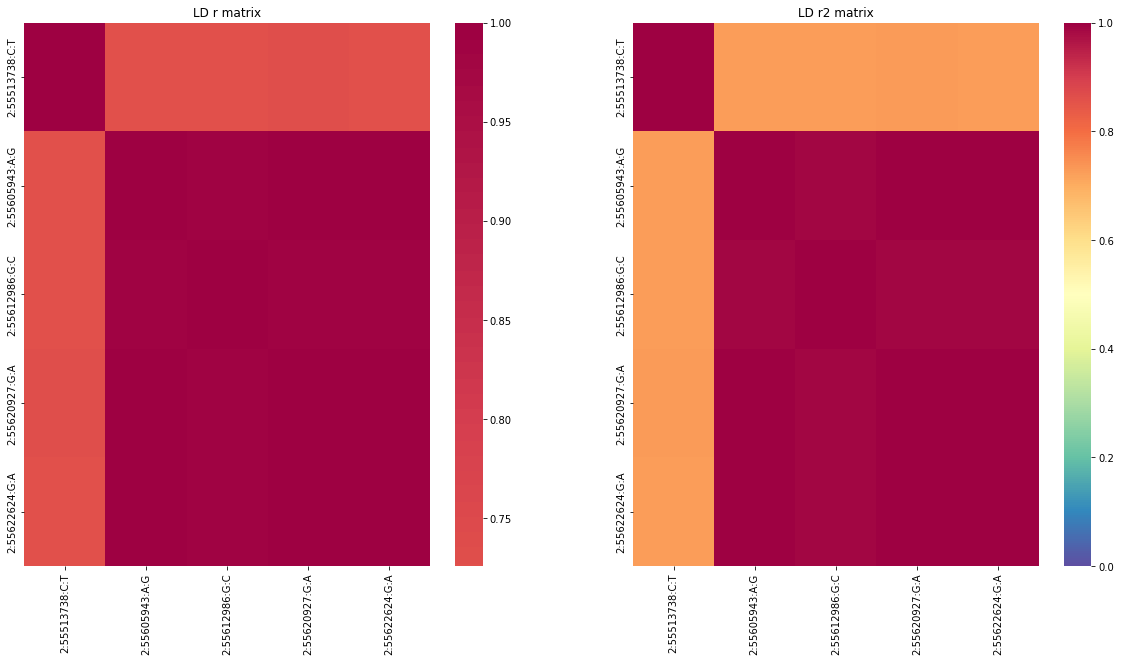

In [34]:
plt.figure(figsize=(10,10),dpi=200)
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
sns.heatmap(data=ld, cmap="Spectral_r",ax=ax[0],center=0)
sns.heatmap(data=ld2,cmap="Spectral_r",ax=ax[1],vmin=0,vmax=1)
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")

Variants in the credible set are in strong LD with the bona fide causal variant. 

This could also happen in real-world analysis. Please always be cautious when interpreting fine-mapping results.